#K_Means

In [4]:
class sklearn.cluster.Kmeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, 
                             tol=0.0001, precompute_distances='auto', verbose=0, 
                             random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

SyntaxError: invalid syntax (<ipython-input-4-41c017089553>, line 1)

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
kmeans=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_)
print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [9]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


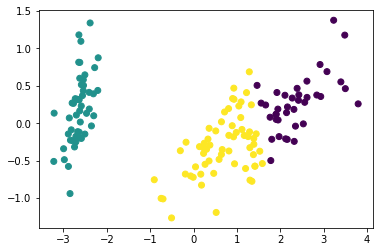

In [13]:
plt.scatter(x=irisDF.loc[:,'pca_x'], y=irisDF.loc[:,'pca_y'], c=irisDF['cluster'])

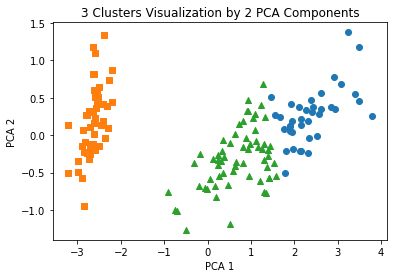

In [12]:
#cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#군집화 알고리즘 테스트를 위한 데이터 생성

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [15]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


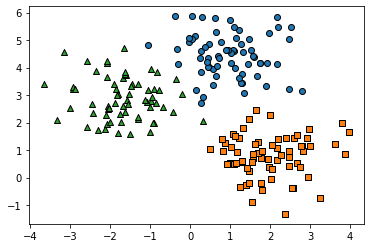

In [16]:
target_list=np.unique(y)

markers=['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

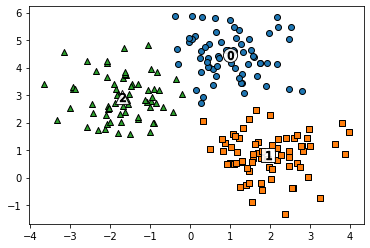

In [19]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)

markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=200, color='white', alpha=0.9, edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=70, color='k', edgecolor='k',marker='$%d$' % label)

    
plt.show()

In [21]:
kmeans.cluster_centers_ #각 군집 중심좌표(x,y)

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [22]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


#실루엣 분석(군집화 평가 방법)

In [24]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [26]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


<AxesSubplot:>

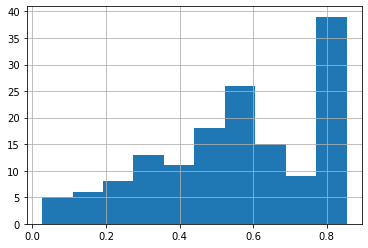

In [27]:
irisDF['silhouette_coeff'].hist()

In [28]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

#군집별 평균 실루엣 계수의 시각화 통한 군집 개수 최적화 방법

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


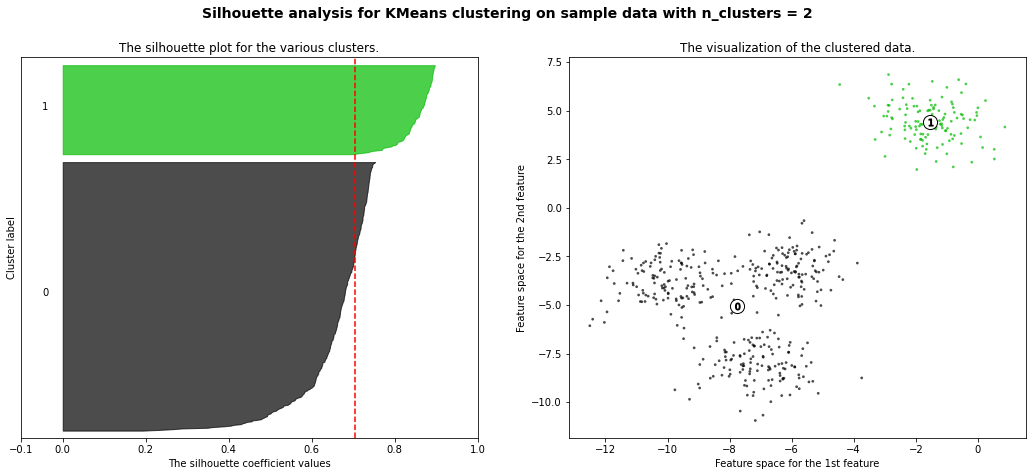

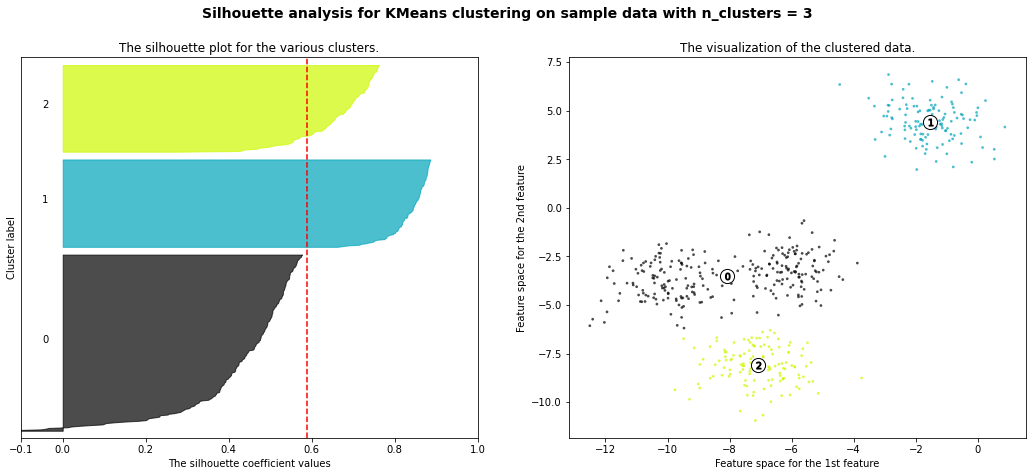

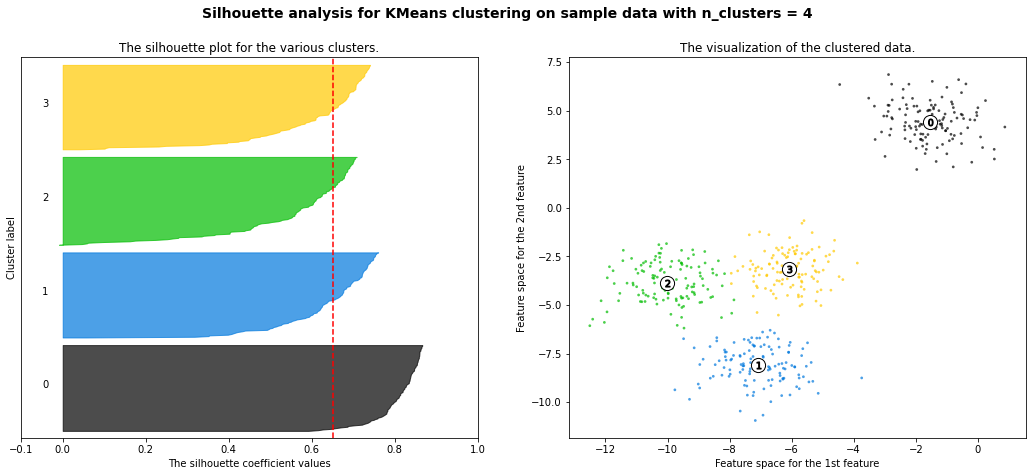

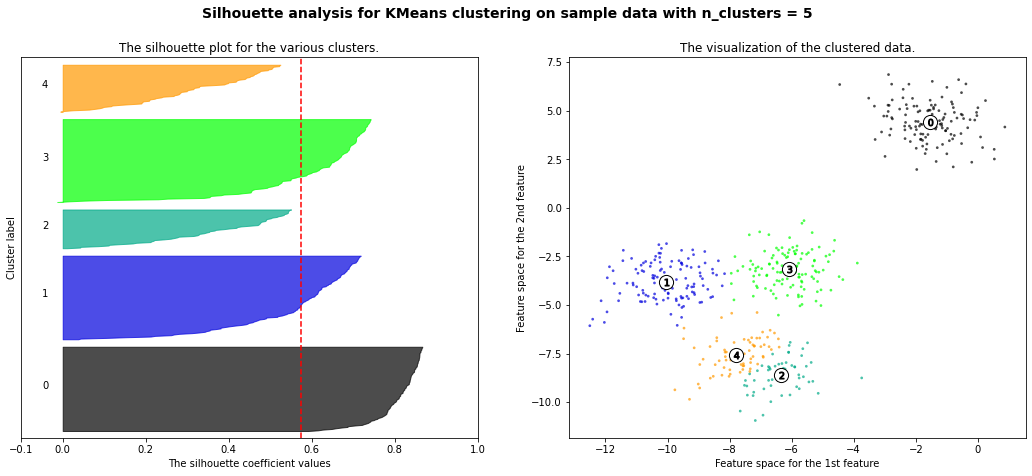

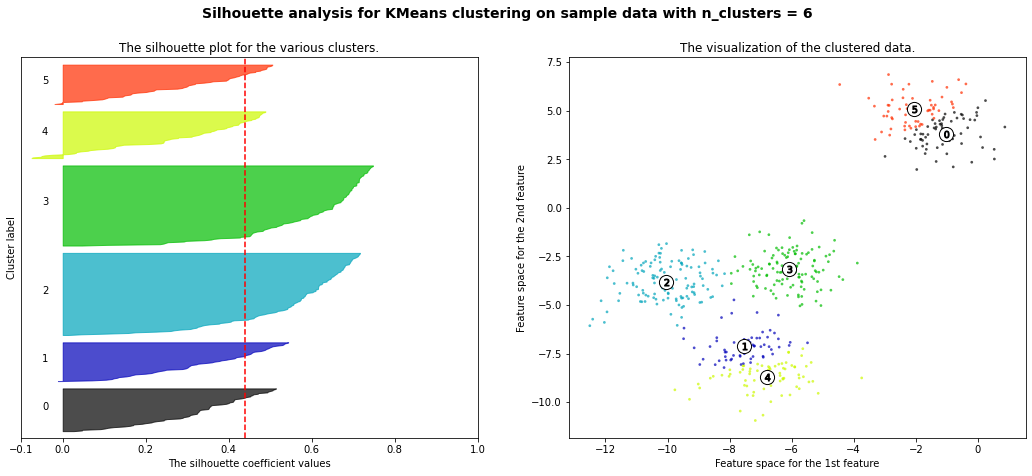

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [29]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

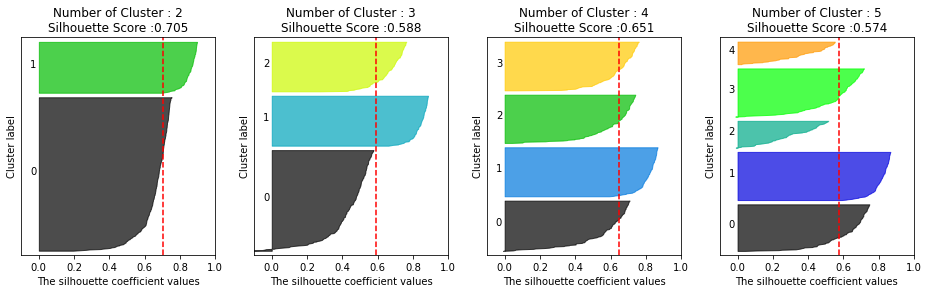

In [30]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

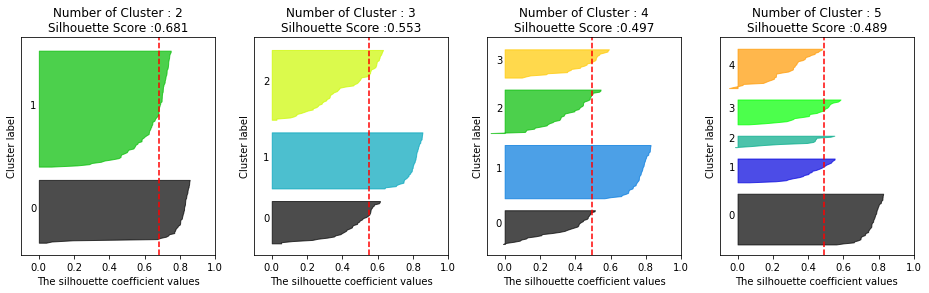

In [31]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

#DBSCAN(밀도기반-특이)

In [32]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [34]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

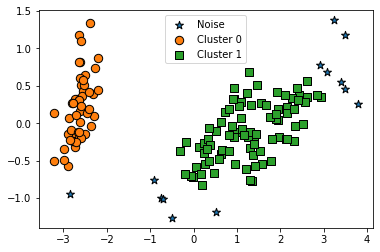

In [35]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

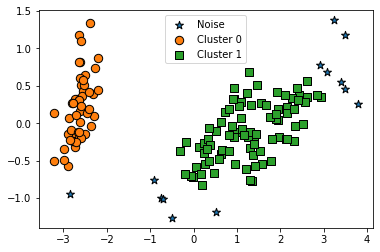

In [36]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


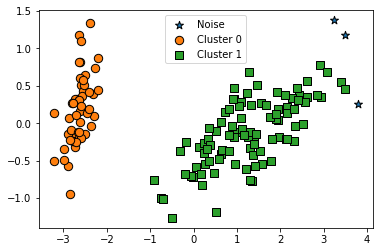

In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

#DBSCAN 적용 - make_circles() 데이터 세트

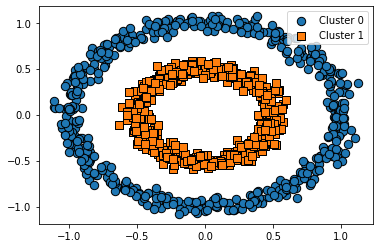

In [38]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

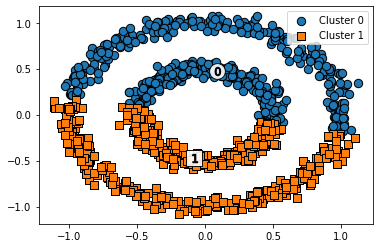

In [39]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

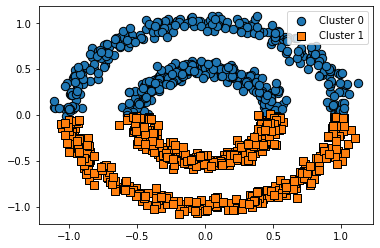

In [40]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

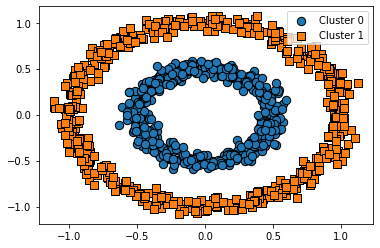

In [41]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


#텍스트 분석 466p~

In [2]:
pip install nltk

  Using cached nltk-3.5.zip (1.4 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached regex-2020.7.14-cp37-cp37m-win_amd64.whl (268 kB)
Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\deep\datab\scripts\python.exe -m pip install --upgrade pip' command.


#클렌징

#텍스트 토큰화(문장/단어)

In [3]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [5]:
from nltk import word_tokenize

sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [6]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    sentences=sent_tokenize(text)
    word_tokens=[word_tokenize(sentence) for sentence in sentences]
    return word_tokens

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
word_tokens=tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [14]:
from nltk import ngrams
sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)

all_ngrams=ngrams(words,2)
ngrams=[ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix'), ('Matrix', 'is'), ('is', 'everywhere'), ('everywhere', 'its'), ('its', 'all'), ('all', 'around'), ('around', 'us'), ('us', ','), (',', 'here'), ('here', 'even'), ('even', 'in'), ('in', 'this'), ('this', 'room'), ('room', '.')]


#스톱워드 제거

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
print('영어 stopwords 개수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stopwords 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [9]:
import nltk

stopwords=nltk.corpus.stopwords.words('english')
all_tokens=[]
for sentence in word_tokens:
    filtered_words=[]
    for word in sentence:
        word=word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [12]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))



work work work
amus amus amus
happy happiest
fant fanciest


In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma=WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


amuse amuse amuse
happy happy
fancy fancy


#Bag of Words(BOW)

In [18]:
text_sample_01='The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02='You take the blue ppill and the story ends. You wake in your bed and you believe whatever you want to believe\
You take the red pill and you stay in Wonderland and show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01);text.append(text_sample_02)
print(text,'\n',len(text))

['The Matrix is everywhere its all around us, here even in this room.                You can see it out your window or on your television.                You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue ppill and the story ends. You wake in your bed and you believe whatever you want to believeYou take the red pill and you stay in Wonderland and show you how deep the rabbit-hole goes.'] 
 2


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect=CountVectorizer()
cnt_vect.fit(text)

CountVectorizer()

In [20]:
print(cnt_vect)

CountVectorizer()


In [21]:
ftr_vect=cnt_vect.transform(text)

In [22]:
print(type(ftr_vect),ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (2, 53)
  (0, 0)	1
  (0, 2)	1
  (0, 7)	1
  (0, 8)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	2
  (0, 16)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	2
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	3
  (0, 26)	1
  (0, 27)	1
  (0, 32)	1
  (0, 33)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	2
  :	:
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 9)	1
  (1, 10)	1
  (1, 15)	1
  (1, 17)	1
  (1, 18)	1
  (1, 19)	2
  (1, 28)	1
  (1, 29)	1
  (1, 30)	1
  (1, 31)	1
  (1, 34)	1
  (1, 35)	1
  (1, 36)	1
  (1, 37)	2
  (1, 40)	4
  (1, 42)	1
  (1, 44)	1
  (1, 45)	1
  (1, 46)	1
  (1, 49)	1
  (1, 51)	6
  (1, 52)	1


In [23]:
print(cnt_vect.vocabulary_)

{'the': 40, 'matrix': 23, 'is': 20, 'everywhere': 12, 'its': 22, 'all': 0, 'around': 2, 'us': 43, 'here': 16, 'even': 11, 'in': 19, 'this': 41, 'room': 32, 'you': 51, 'can': 7, 'see': 33, 'it': 21, 'out': 26, 'your': 52, 'window': 48, 'or': 25, 'on': 24, 'television': 39, 'feel': 13, 'when': 47, 'go': 14, 'to': 42, 'work': 50, 'church': 8, 'pay': 27, 'taxes': 38, 'take': 37, 'blue': 6, 'ppill': 29, 'and': 1, 'story': 36, 'ends': 10, 'wake': 44, 'bed': 3, 'believe': 4, 'whatever': 46, 'want': 45, 'believeyou': 5, 'red': 31, 'pill': 28, 'stay': 35, 'wonderland': 49, 'show': 34, 'how': 18, 'deep': 9, 'rabbit': 30, 'hole': 17, 'goes': 15}


In [24]:
cnt_vect=CountVectorizer(max_features=5, stop_words='english')
cnt_vect.fit(text)
ftr_vect=cnt_vect.transform(text)
print(type(ftr_vect),ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 5)
{'window': 4, 'television': 1, 'wake': 2, 'bed': 0, 'want': 3}


In [25]:
cnt_vect=CountVectorizer(ngram_range=(1,3))
cnt_vect.fit(text)
ftr_vect=cnt_vect.transform(text)
print(type(ftr_vect),ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 204)
{'the': 132, 'matrix': 78, 'is': 67, 'everywhere': 41, 'its': 75, 'all': 0, 'around': 11, 'us': 153, 'here': 52, 'even': 38, 'in': 60, 'this': 143, 'room': 109, 'you': 177, 'can': 26, 'see': 112, 'it': 70, 'out': 91, 'your': 196, 'window': 168, 'or': 84, 'on': 81, 'television': 129, 'feel': 44, 'when': 165, 'go': 47, 'to': 146, 'work': 174, 'church': 29, 'pay': 94, 'taxes': 128, 'the matrix': 135, 'matrix is': 79, 'is everywhere': 68, 'everywhere its': 42, 'its all': 76, 'all around': 1, 'around us': 12, 'us here': 154, 'here even': 53, 'even in': 39, 'in this': 61, 'this room': 144, 'room you': 110, 'you can': 180, 'can see': 27, 'see it': 113, 'it out': 71, 'out your': 92, 'your window': 202, 'window or': 169, 'or on': 87, 'on your': 82, 'your television': 200, 'television you': 130, 'you feel': 182, 'feel it': 45, 'it when': 73, 'when you': 166, 'you go': 184, 'go to': 48, 'to work': 151, 'work or': 175, 'or go': 85, 'to church': 149, '

In [26]:
cnt_vect=CountVectorizer(ngram_range=(2,2))
cnt_vect.fit(text)
ftr_vect=cnt_vect.transform(text)
print(type(ftr_vect),ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 75)
{'the matrix': 46, 'matrix is': 27, 'is everywhere': 23, 'everywhere its': 14, 'its all': 26, 'all around': 0, 'around us': 4, 'us here': 54, 'here even': 17, 'even in': 13, 'in this': 20, 'this room': 50, 'room you': 38, 'you can': 63, 'can see': 9, 'see it': 39, 'it out': 24, 'out your': 32, 'your window': 74, 'window or': 59, 'or on': 30, 'on your': 28, 'your television': 73, 'television you': 44, 'you feel': 64, 'feel it': 15, 'it when': 25, 'when you': 58, 'you go': 65, 'go to': 16, 'to work': 53, 'work or': 61, 'or go': 29, 'to church': 52, 'church or': 10, 'or pay': 31, 'pay your': 33, 'your taxes': 72, 'you take': 68, 'take the': 43, 'the blue': 45, 'blue ppill': 8, 'ppill and': 35, 'and the': 2, 'the story': 49, 'story ends': 42, 'ends you': 12, 'you wake': 69, 'wake in': 55, 'in your': 22, 'your bed': 71, 'bed and': 5, 'and you': 3, 'you believe': 62, 'believe whatever': 6, 'whatever you': 57, 'you want': 70, 'want to': 56, 'to be

#BOW 벡터화를 위한 희소 행렬

#COO형식

In [27]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [28]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [29]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

#CSR형식

In [30]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [31]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)